In [17]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [29]:
df = pd.read_csv("/content/모델제작용데이터셋(헬스케어).csv", encoding = "utf-8")
df.tail()

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율
13178340,2,1,47,0,21,15,15,4
13178341,2,1,47,0,11,9,9,2
13178342,2,1,47,0,12,7,15,3
13178343,2,1,47,1,11,15,15,3
13178344,2,1,47,0,13,9,9,1


In [30]:
df['연령대'] = df['연령대코드'].apply(lambda x: ((x-1)//2)*10)
df.tail()

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율,연령대
13178340,2,1,47,0,21,15,15,4,0
13178341,2,1,47,0,11,9,9,2,0
13178342,2,1,47,0,12,7,15,3,0
13178343,2,1,47,1,11,15,15,3,0
13178344,2,1,47,0,13,9,9,1,0


## 입원비율

In [31]:
df['서식코드'].mean()

0.021547622254539548

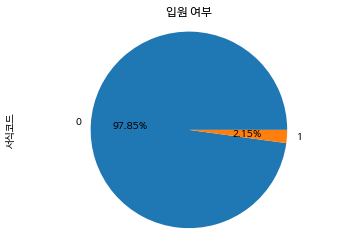

In [32]:
df_temp = df['서식코드'].value_counts()
df_temp.plot.pie(autopct='%.2f%%')
plt.title('입원 여부')
plt.axis('equal')
plt.show()

## 연령별 입원비율

In [33]:
df_age = pd.crosstab(df.연령대, df.서식코드)
df_age

서식코드,0,1
연령대,,
0,1624432,25598
10,697410,7711
20,800033,12843
30,1123800,20921
40,1455406,24466
50,2063228,41426
60,2305206,47685
70,1909023,46708
80,915845,56604


In [51]:
df_age.loc[:,0].tolist()

[1624432, 697410, 800033, 1123800, 1455406, 2063228, 2305206, 1909023, 915845]

In [46]:
df_age.loc[:,1]

연령대
0     25598
10     7711
20    12843
30    20921
40    24466
50    41426
60    47685
70    46708
80    56604
Name: 1, dtype: int64

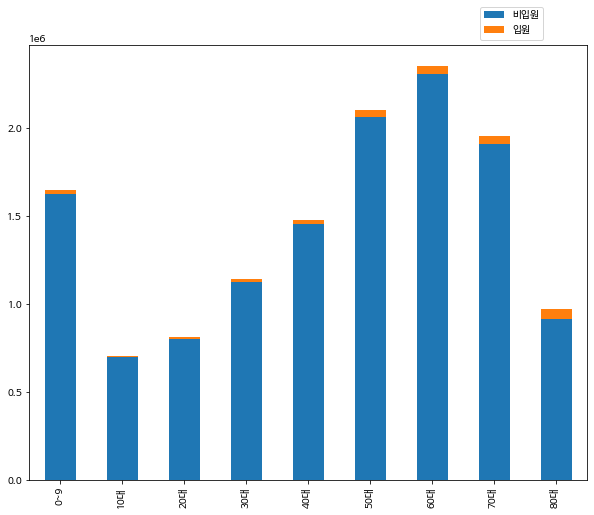

In [53]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : df_age.loc[:,0].tolist(),
    '입원' : df_age.loc[:,1].tolist()
}
df_temp=pd.DataFrame(data,index=age)

df_temp.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [55]:
df_age['합'] = df_age.loc[:,0] + df_age.loc[:,1]
df_age

서식코드,0,1,합
연령대,,,
0,1624432,25598,1650030
10,697410,7711,705121
20,800033,12843,812876
30,1123800,20921,1144721
40,1455406,24466,1479872
50,2063228,41426,2104654
60,2305206,47685,2352891
70,1909023,46708,1955731
80,915845,56604,972449


In [59]:
df_age['입원비율'] = df_age.loc[:,1] / df_age.loc[:,'합']
df_age['비입원비율'] = df_age.loc[:,0] / df_age.loc[:,'합']
df_age

서식코드,0,1,합,입원비율,비입원비율
연령대,,,,,
0,1624432,25598,1650030,0.015514,0.984486
10,697410,7711,705121,0.010936,0.989064
20,800033,12843,812876,0.015799,0.984201
30,1123800,20921,1144721,0.018276,0.981724
40,1455406,24466,1479872,0.016533,0.983467
50,2063228,41426,2104654,0.019683,0.980317
60,2305206,47685,2352891,0.020267,0.979733
70,1909023,46708,1955731,0.023883,0.976117
80,915845,56604,972449,0.058208,0.941792


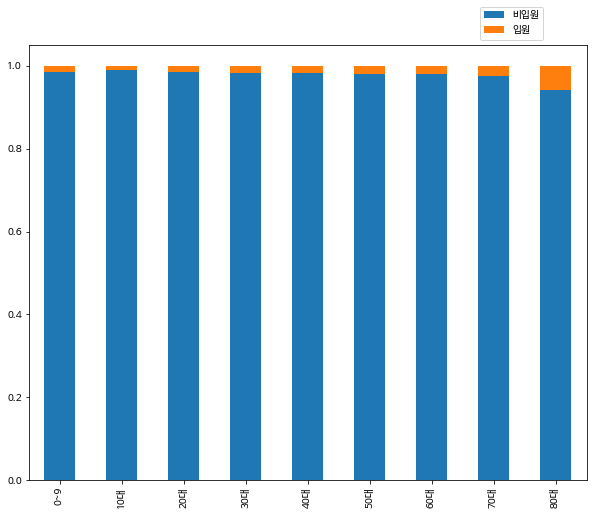

In [60]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : df_age.loc[:,'비입원비율'].tolist(),
    '입원' : df_age.loc[:,'입원비율'].tolist()
}
df_temp=pd.DataFrame(data,index=age)

df_temp.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

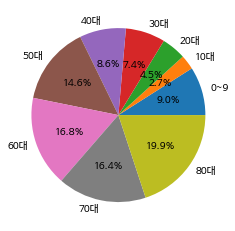

In [54]:
# 연령별 입원환자 비율
ratio = df_age.loc[:,1].tolist()
labels = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()